# Start Feature engineering process

Import needed libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

Import extracted cleaned files

In [5]:
path = '../data/clean/clean_medical_records.csv'
clean_patient_records = pd.read_csv(path)
clean_patient_records.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0


In [7]:
# Identify statistical descriptions of each column in dataset
from helpers import basic_eda as beda
beda.statistical_information(clean_patient_records)

Información de la la columna age
count    297.000000
mean      54.542088
std        9.049736
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64
Información de la la columna sex
count    297.000000
mean       0.676768
std        0.468500
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64
Información de la la columna cp
count    297.000000
mean       3.158249
std        0.964859
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: cp, dtype: float64
Información de la la columna trestbps
count    297.000000
mean     131.693603
std       17.762806
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64
Información de la la columna chol
count    297.000000
mean     247.350168
std       51.997583
min      126.000000
25

In [8]:
# standarize column names
actual_columns = clean_patient_records.columns
list_names = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
              'serum_cholesterol', 'fasting_blood_sugar_g_120',
              'resting_egc_results', 'maximum_heart_rate', 'exersize_induced_angina', 'ST_depression', 'slope_of_peak_exercise_st_segment','major_vessels', 'Thalassemia', 'target']
# create list of dicitonaries
dict = {key: value for key, value in zip(actual_columns, list_names)}
# rename columns
renamed_records = clean_patient_records.rename(columns=dict)
renamed_records.head(1)

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar_g_120,resting_egc_results,maximum_heart_rate,exersize_induced_angina,ST_depression,slope_of_peak_exercise_st_segment,major_vessels,Thalassemia,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0


In [9]:
# lowercase all column names
renamed_records.columns = renamed_records.columns.str.lower()
renamed_records.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholesterol', 'fasting_blood_sugar_g_120', 'resting_egc_results',
       'maximum_heart_rate', 'exersize_induced_angina', 'st_depression',
       'slope_of_peak_exercise_st_segment', 'major_vessels', 'thalassemia',
       'target'],
      dtype='object')

Note that some variables, like thalassemia are categorical, but in order for the model to undertnad its meaning the numerical clasiffications mus be kept, and since in some cases there is more categories and the categorical variables that have only two states (1 or 0) there is no need to change any other variables.

In [10]:
# saved modified dataset in curated folder.
renamed_records.to_csv('../data/curated/curated_medical_records.csv', index=False)

(array([214.,  83.]), array([0., 2., 4.]), <BarContainer object of 2 artists>)

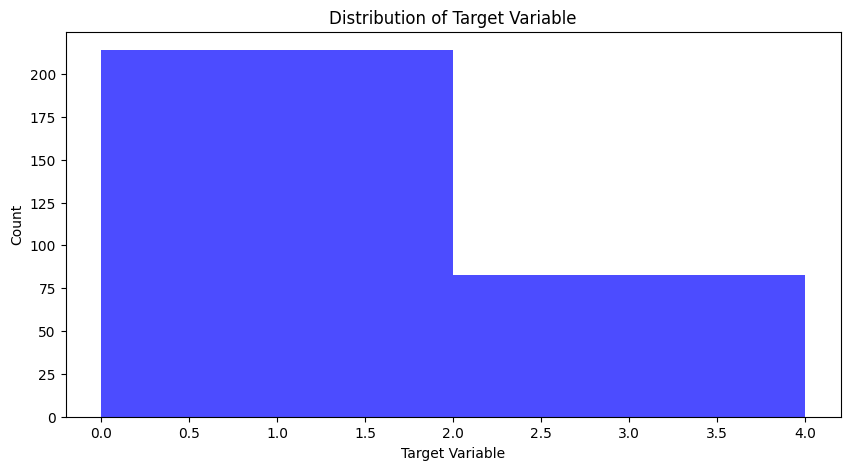

In [11]:
# Distribution of target variable
plt.figure(figsize=(10, 5))
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.hist(renamed_records['target'], bins=2, color='blue', alpha=0.7)


In [12]:
renamed_records['target'].value_counts()

target
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

target
0    160
1     54
2     35
3     35
4     13
dtype: int64